Kernel: We need to use the Python 3.9.7 from the Anaconda distribution.

#  **1. Import libraries**

First, we need to import some libraries for data processing.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7) # Long plot

* `pandas:` offers data structures and operations to manipulate numerical tables and time series.
* `numpy:` offers a giant collection of high-level mathematical functions to operate on arrays and matrices.
* `matplotlib:` offers an interactive visualization lile plotting graphs.

# **2. Data Collection**

## ***2.1 Get raw data***

Our data is stored in a CSV file.

In [15]:
data_dir = '../Data/USW00013984.csv'
df = pd.read_csv(data_dir)
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
0,USW00013984,1886,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",NaN,NaN,741.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013984,1887,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",NaN,NaN,710.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013984,1888,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",NaN,NaN,644.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013984,1889,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",NaN,NaN,535.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013984,1890,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",NaN,NaN,743.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,USW00013984,2018,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",4.6,W,829.7,NaN,...,NaN,NaN,18.3,W,26.8,W,NaN,NaN,NaN,NaN
120,USW00013984,2019,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",4.7,W,899.9,NaN,...,NaN,NaN,17.9,W,27.3,W,NaN,NaN,NaN,NaN
121,USW00013984,2020,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",4.6,W,937.3,NaN,...,NaN,NaN,19.7,W,28.2,W,NaN,NaN,NaN,NaN
122,USW00013984,2021,39.55127,-97.65077,444.3,"CONCORDIA ASOS, KS US",4.7,W,NaN,NaN,...,NaN,NaN,24.6,W,39.3,W,NaN,NaN,NaN,NaN


Then, we will get the precipitation data from the CSV file.

In [16]:
prcp = df[['DATE', 'PRCP']]
prcp

,DATE,PRCP
0,1886,718.0
1,1887,642.1
2,1888,590.4
3,1889,875.8
4,1890,448.7
...,...,...
119,2018,860.3
120,2019,884.5
121,2020,664.1
122,2021,585.9


From 1886 to 2022, there are 137 years. However, result from the code above contains only 124 rows. If we do not consider the year 2022, there are 12 missed rows. Let's find them.

In [17]:
is_available = []
prcp_len = len(prcp)
# print(prcp_len)
beginning_year = int(prcp.iloc[0]['DATE'])
# print(beginning_year)
end_year = int(prcp.iloc[prcp_len - 1]['DATE'])
# print(end_year)
for i in range(beginning_year, end_year + 1, 1):
    is_available.append(False)

# print(len(is_available))

for i in range(prcp_len):
    if np.isnan(prcp.iloc[i]['PRCP']):
        continue
    is_available[int(prcp.iloc[i]['DATE']) - beginning_year] = True

missing_years = []
for i in range(len(is_available)):
    if is_available[i] == False:
        missing_years.append(i + beginning_year)

print(missing_years)
# len(missing_years)

[1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 2022]


And now, we have 13 missing years from 1949 to 1961. Two years 1962 and 2022 have the NaN value.

We have to fill in missing cells.

In [18]:
# we don't check the condition because we have the data about missing years
def fill_missing(data_list, begin, end):
    print("Begin: ", begin)
    print("End: ", end)
    for i in range(begin, end + 1, 1):
        sum = 0
        for j in range(i - 2, i, 1):
            sum += data_list[j]
        data_list[i] = round(sum / 2, 1)

begin_missing_year = missing_years[0]
end_missing_year = missing_years[len(missing_years) - 2]

years = []
for i in range(beginning_year, end_year + 1, 1):
    years.append(i)

values = []
for i in range(beginning_year, begin_missing_year, 1):
    values.append(prcp.iloc[i - beginning_year]['PRCP'])
for i in range(begin_missing_year, end_missing_year + 1, 1):
    values.append(0)
number_of_missing_years = end_missing_year + 1 - begin_missing_year
for i in range(end_missing_year + 1, end_year, 1):
    values.append(prcp.iloc[i - beginning_year - number_of_missing_years]['PRCP'])
values.append(0) # for the year 2022, but not necessary at all

# print(years)
# print(len(years))
print(values)
# print(len(values))

fill_missing(values, begin_missing_year - beginning_year, end_missing_year - beginning_year + 1)
print(values)

[718.0, 642.1, 590.4, 875.8, 448.7, 875.9, 715.7, 545.3, 695.0, 436.4, 846.5, 799.4, 516.5, 780.3, 648.8, 463.6, 894.9, 970.3, 859.6, 805.1, 505.8, 610.8, 1063.4, 827.5, 577.9, 619.7, 606.3, 609.5, 467.2, 953.2, 509.0, 388.2, 617.8, 667.8, 622.0, 483.2, 592.2, 773.1, 450.1, 553.1, 508.3, 763.3, 733.3, 665.4, 634.8, 674.9, 691.9, 508.6, 388.6, 852.2, 407.7, 469.7, 693.2, 505.8, 463.2, 773.5, 719.6, 612.0, 935.2, 729.2, 830.7, 607.3, 664.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 590.9, 727.0, 844.4, 385.2, 972.0, 762.4, 750.5, 725.6, 896.3, 831.3, 1128.4, 402.7, 638.3, 443.2, 896.1, 771.7, 675.2, 494.3, 856.1, 940.1, 650.4, 730.0, 654.6, 1021.0, 867.1, 369.7, 630.6, 652.3, 507.0, 1055.4, 1138.4, 487.1, 692.6, 720.0, 677.1, 836.3, 647.3, 460.9, 691.4, 457.7, 614.1, 624.2, 680.6, 608.7, 753.1, 849.2, 681.1, 815.2, 788.4, 610.0, 691.0, 691.6, 746.2, 763.0, 934.7, 860.3, 884.5, 664.1, 0]
Begin:  63
End:  77
[718.0, 642.1, 590.4, 875.8, 448.7, 875.9, 715.7, 545.3, 695.0, 436.4, 846.5,

In [19]:
years = years[0:len(years) - 1]
values = values[0:len(values) - 1]
print(years)
print(values)

data = {'Year': years, 'Precipitation': values}
data_frame = pd.DataFrame.from_dict(data)
print(data_frame)

data_frame.to_csv("data.csv")

[1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[718.0, 642.1, 590.4, 875.8, 448.7, 875.9, 715.7, 545.3, 695.0, 436.4, 846.5, 799.4, 516.5, 780.3, 648.8, 463.6, 894.9, 970.3, 859.6, 805.1, 505.8, 610.8, 1063.4, 827.5, 577.9, 619.7,

In [20]:
df = pd.read_csv("./data.csv")

In [21]:
prec_data =(df.loc[:, "Precipitation"].to_numpy())
print(prec_data)

[ 718.   642.1  590.4  875.8  448.7  875.9  715.7  545.3  695.   436.4
  846.5  799.4  516.5  780.3  648.8  463.6  894.9  970.3  859.6  805.1
  505.8  610.8 1063.4  827.5  577.9  619.7  606.3  609.5  467.2  953.2
  509.   388.2  617.8  667.8  622.   483.2  592.2  773.1  450.1  553.1
  508.3  763.3  733.3  665.4  634.8  674.9  691.9  508.6  388.6  852.2
  407.7  469.7  693.2  505.8  463.2  773.5  719.6  612.   935.2  729.2
  830.7  607.3  664.3  635.8  650.   642.9  646.4  644.6  645.5  645.
  645.2  645.1  645.2  645.2  645.2  645.2  645.2  645.2  590.9  727.
  844.4  385.2  972.   762.4  750.5  725.6  896.3  831.3 1128.4  402.7
  638.3  443.2  896.1  771.7  675.2  494.3  856.1  940.1  650.4  730.
  654.6 1021.   867.1  369.7  630.6  652.3  507.  1055.4 1138.4  487.1
  692.6  720.   677.1  836.3  647.3  460.9  691.4  457.7  614.1  624.2
  680.6  608.7  753.1  849.2  681.1  815.2  788.4  610.   691.   691.6
  746.2  763.   934.7  860.3  884.5  664.1]


In [22]:
from scipy import stats
mode = stats.mode(prec_data)[0]
print(f"Mode: {mode}")

Mode: [645.2]


In [23]:
mean = np.mean(prec_data)
print(f"Mean: {mean}")

Mean: 684.3316176470589


(array([ 8., 18.,  6., 43., 21., 13., 16.,  6.,  2.,  3.]),
 array([ 369.7 ,  446.57,  523.44,  600.31,  677.18,  754.05,  830.92,
         907.79,  984.66, 1061.53, 1138.4 ]),
 <BarContainer object of 10 artists>)

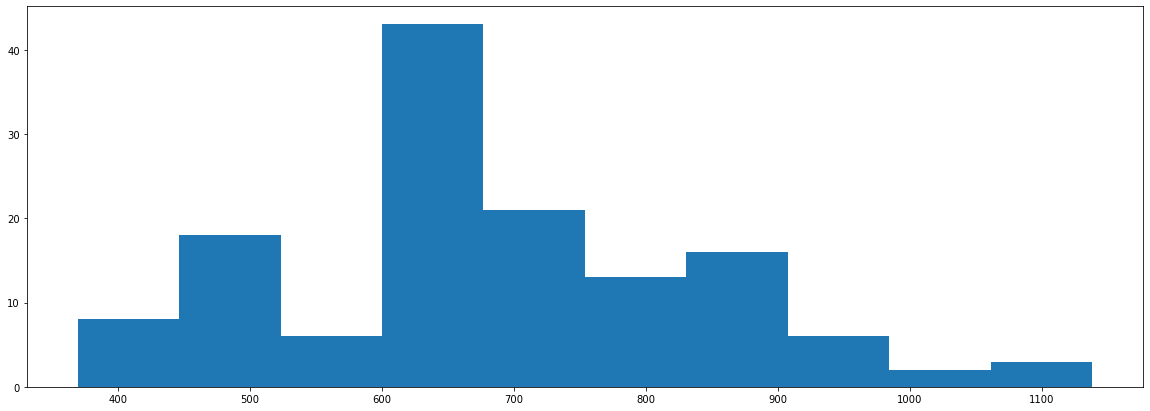

In [24]:
plt.hist(prec_data) # histogram

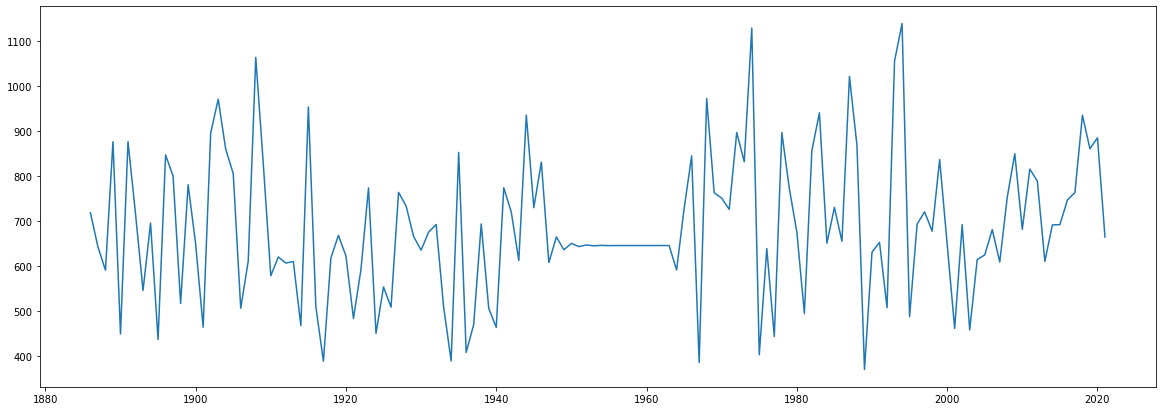

In [25]:
year = (df.loc[:, "Year"].to_numpy())
plt.plot(year, prec_data) # line

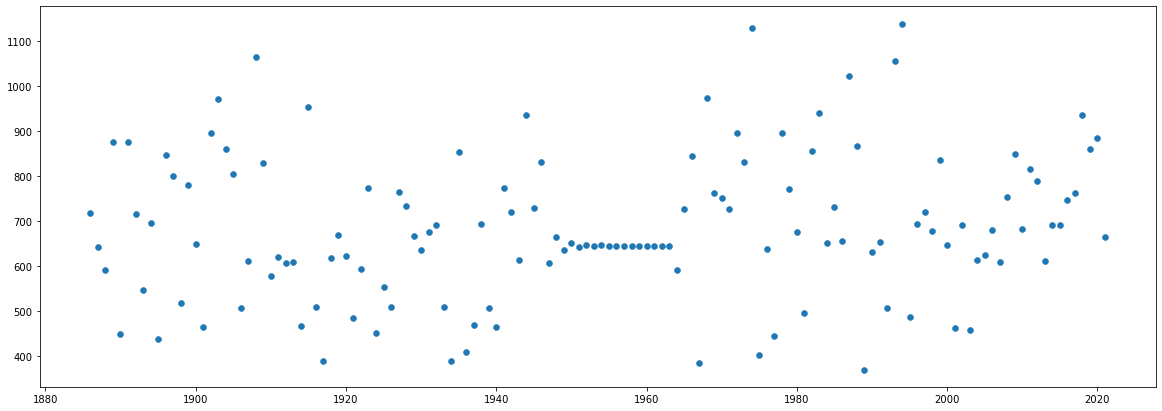

In [26]:
plt.scatter(year, prec_data, linewidths=0.5) # scatter